In [1]:
import numpy as np

In [2]:
pred_result_fn = '/zfssz2/ST_MCHRI/BIGDATA/PROJECT/NIPT_CNV/1dcnn_resnet/test_out/test0.10_win1000_minsize160000_pred.npz'
with np.load(pred_result_fn) as pred_result:
    ypred=pred_result['ypred']
    ytrue=pred_result['ytrue']
    

In [3]:
ypred[:5]

array([[5.4717083e-07, 9.9997520e-01, 2.4193398e-05],
       [1.6776424e-07, 4.6516510e-05, 9.9995327e-01],
       [2.6657529e-10, 1.1450062e-08, 1.0000000e+00],
       [2.3017944e-06, 5.6872582e-06, 9.9999201e-01],
       [6.9845041e-06, 1.4827479e-04, 9.9984467e-01]], dtype=float32)

In [4]:
ytrue[:5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [5]:
ypred_l = np.argmax(ypred, axis=1)
ytrue_l = np.argmax(ytrue, axis=1)

In [14]:
ytrue_l[:5]

array([1, 2, 2, 2, 2])

In [6]:
len(ypred_l)

642947

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from pandas_ml import ConfusionMatrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.96231184 0.02656104 0.01112711]
 [0.0070448  0.96959143 0.02336377]
 [0.0031949  0.02259383 0.97421127]]


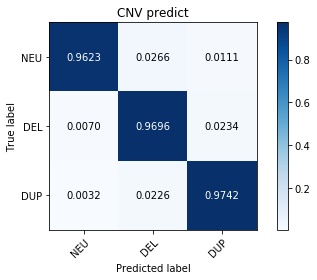

In [8]:

class_names=np.array(['NEU','DEL','DUP'])
plot_confusion_matrix(ytrue_l, ypred_l, classes=class_names, normalize=True,title='CNV predict')


In [19]:
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from scipy import interp

In [20]:
n_classes = 3
# Compute ROC curve and ROC area for each class

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes): #['NEU','DEL','DUP']
    fpr[i], tpr[i], _ = roc_curve(ytrue[:, i], ypred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

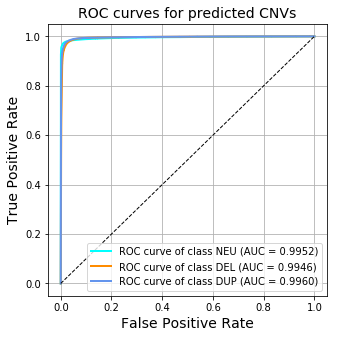

In [47]:
plt.figure(figsize=(5,5))
class_names = ['NEU','DEL','DUP']
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.4f})'
             ''.format(class_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC curves for predicted CNVs', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
# plt.axis('equal')
plt.show()

In [9]:
import pandas as pd

epoch_logger = '/zfssz2/ST_MCHRI/BIGDATA/PROJECT/NIPT_CNV/1dcnn_resnet/final_model/model_csvlogger/b256_e50_lr0.001_dr0.5_fc128_blk443-cnvnet'

epoch_pd = pd.read_csv(epoch_logger)

epoch_pd.head(50)



,epoch,acc,loss,val_acc,val_loss
0,0,0.641853,0.794464,0.553989,1.167390
1,1,0.706766,0.674155,0.656881,0.786457
2,2,0.783598,0.527687,0.800208,0.522518
3,3,0.841724,0.409622,0.869676,0.354382
4,4,0.877198,0.331316,0.897379,0.283671
5,5,0.898747,0.279874,0.914834,0.244984
6,6,0.913886,0.241945,0.926183,0.216781
7,7,0.924356,0.215061,0.932394,0.201196
8,8,0.932996,0.192297,0.940320,0.181479
9,9,0.939841,0.173335,0.941818,0.176129


[Text(0,0,'0'),
 Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5'),
 Text(0,0,'6'),
 Text(0,0,'7'),
 Text(0,0,'8'),
 Text(0,0,'9'),
 Text(0,0,'10'),
 Text(0,0,'11'),
 Text(0,0,'12'),
 Text(0,0,'13'),
 Text(0,0,'14'),
 Text(0,0,'15'),
 Text(0,0,'16'),
 Text(0,0,'17'),
 Text(0,0,'18'),
 Text(0,0,'19'),
 Text(0,0,'20'),
 Text(0,0,'21'),
 Text(0,0,'22'),
 Text(0,0,'23'),
 Text(0,0,'24'),
 Text(0,0,'25'),
 Text(0,0,'26'),
 Text(0,0,'27'),
 Text(0,0,'28'),
 Text(0,0,'29'),
 Text(0,0,'30'),
 Text(0,0,'31'),
 Text(0,0,'32'),
 Text(0,0,'33'),
 Text(0,0,'34'),
 Text(0,0,'35'),
 Text(0,0,'36'),
 Text(0,0,'37'),
 Text(0,0,'38'),
 Text(0,0,'39'),
 Text(0,0,'40'),
 Text(0,0,'41'),
 Text(0,0,'42'),
 Text(0,0,'43'),
 Text(0,0,'44'),
 Text(0,0,'45'),
 Text(0,0,'46'),
 Text(0,0,'47'),
 Text(0,0,'48'),
 Text(0,0,'49')]

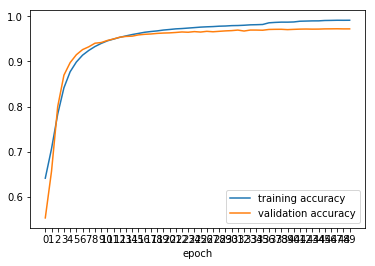

In [10]:
# train result
fig, ax = plt.subplots()
epoch_pd.plot(ax=ax, kind='line',x='epoch', y='acc', label='training accuracy')
epoch_pd.plot(ax=ax, kind='line',x='epoch', y='val_acc', label='validation accuracy')
ax.set_xlabel("epoch")
ax.set_xticks(epoch_pd.index)
ax.set_xticklabels(epoch_pd['epoch'])


In [11]:
#  calculate 
def get_cls_reports(y_true,y_pred):
    cm = confusion_matrix(y_true, y_pred)
    
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    
    # Precision or positive predictive value
    PPV = TP/(TP+FP)

    # Negative predictive value
    NPV = TN/(TN+FN)

    # Fall out or false positive rate
    FPR = FP/(FP+TN)

    # False negative rate or Miss Rate
    FNR = FN/(TP+FN)
    
    # False discovery rate
    FDR = FP/(TP+FP)
    
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    
    return (TPR, TNR, PPV,NPV,FPR,FNR,FDR,ACC)

In [18]:
# from pandas_ml import ConfusionMatrix
from pycm import ConfusionMatrix
confusion_matrix = ConfusionMatrix(ytrue_l,ypred_l)
#confusion_matrix.print_stats()
print(confusion_matrix)

Predict      0            1            2            
Actual
0            68149        1881         788          

1            1422         195713       4716         

2            1183         8366         360729       





Overall Statistics : 

95% CI                                                            (0.97104,0.97186)
ACC Macro                                                         0.98097
AUNP                                                              0.97602
AUNU                                                              0.97636
Bennett S                                                         0.95718
CBA                                                               0.96226
Chi-Squared                                                       1163402.28545
Chi-Squared DF                                                    4
Conditional Entropy                                               0.20582
Cramer V                                                          0.95118
C

In [16]:
confusion_matrix.print_stats()



/zfssz2/ST_MCHRI/BIGDATA/USER/baiyong/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
/zfssz2/ST_MCHRI/BIGDATA/USER/baiyong/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:60: RuntimeWarning: overflow encountered in long_scalars
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
/zfssz2/ST_MCHRI/BIGDATA/USER/baiyong/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:61: RuntimeWarning: overflow encountered in long_scalars
  den = (np.float64(nis2 + njs2) / 2 - np.float64(nis2 * njs2) / n2)
/zfssz2/ST_MCHRI/BIGDATA/USER/baiyong/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:302: RuntimeWar

ValueError: math domain error

In [48]:
train_re = train_acc[train_acc['Kfold']==1]


[Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5'),
 Text(0,0,'6'),
 Text(0,0,'7'),
 Text(0,0,'8'),
 Text(0,0,'9'),
 Text(0,0,'10'),
 Text(0,0,'11'),
 Text(0,0,'12'),
 Text(0,0,'13'),
 Text(0,0,'14'),
 Text(0,0,'15'),
 Text(0,0,'16'),
 Text(0,0,'17'),
 Text(0,0,'18'),
 Text(0,0,'19'),
 Text(0,0,'20')]

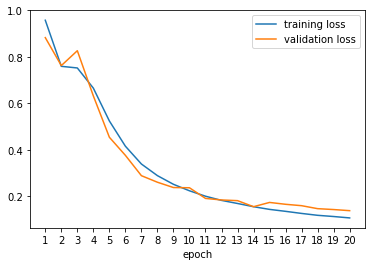

[Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5'),
 Text(0,0,'6'),
 Text(0,0,'7'),
 Text(0,0,'8'),
 Text(0,0,'9'),
 Text(0,0,'10'),
 Text(0,0,'11'),
 Text(0,0,'12'),
 Text(0,0,'13'),
 Text(0,0,'14'),
 Text(0,0,'15'),
 Text(0,0,'16'),
 Text(0,0,'17'),
 Text(0,0,'18'),
 Text(0,0,'19'),
 Text(0,0,'20')]

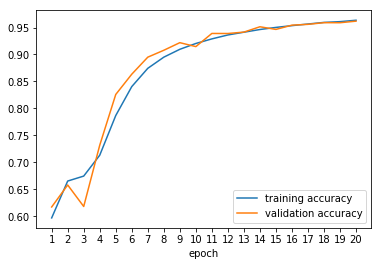

In [61]:
fig, ax = plt.subplots()
train_re.plot(ax=ax, kind='line',x='N_Epoch', y='train_acc', label='training accuracy')
train_re.plot(ax=ax, kind='line',x='N_Epoch', y='val_acc', label='validation accuracy')
ax.set_xlabel("epoch")
ax.set_xticks(train_re.index)
ax.set_xticklabels(train_re['N_Epoch'])